## Problem Statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#### Importing required Libraries

In [2]:
#!pip install tensorflow

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 
     

In [4]:
path_train_data=(r"D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
path_test_data=(r"D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [7]:
path_train_data=(r"C:\Users\shashidhar\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
path_test_data=(r"C:\Users\shashidhar\Desktop\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [8]:
data_dir_train=pathlib.Path(path_train_data)
data_dir_test=pathlib.Path(path_test_data)

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


###### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

We have been told to use batch size of 32 and resize the image to 180*180.

#### Implementing the Parameters

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

### Instructions


In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

### Train Data set

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
#train_ds

### Validation Data Set

In [14]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
data_dir_train,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### For test DataSet

In [15]:
test_ds=keras.preprocessing.image_dataset_from_directory(
data_dir_test,image_size=(img_height,img_width),batch_size=batch_size)

Found 118 files belonging to 9 classes.


### List all classes names 

In [16]:
class_names=train_ds.class_names

In [17]:
print(class_names,len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'] 9


-  Total there are 9 different classes in the data set

### Visualize the data

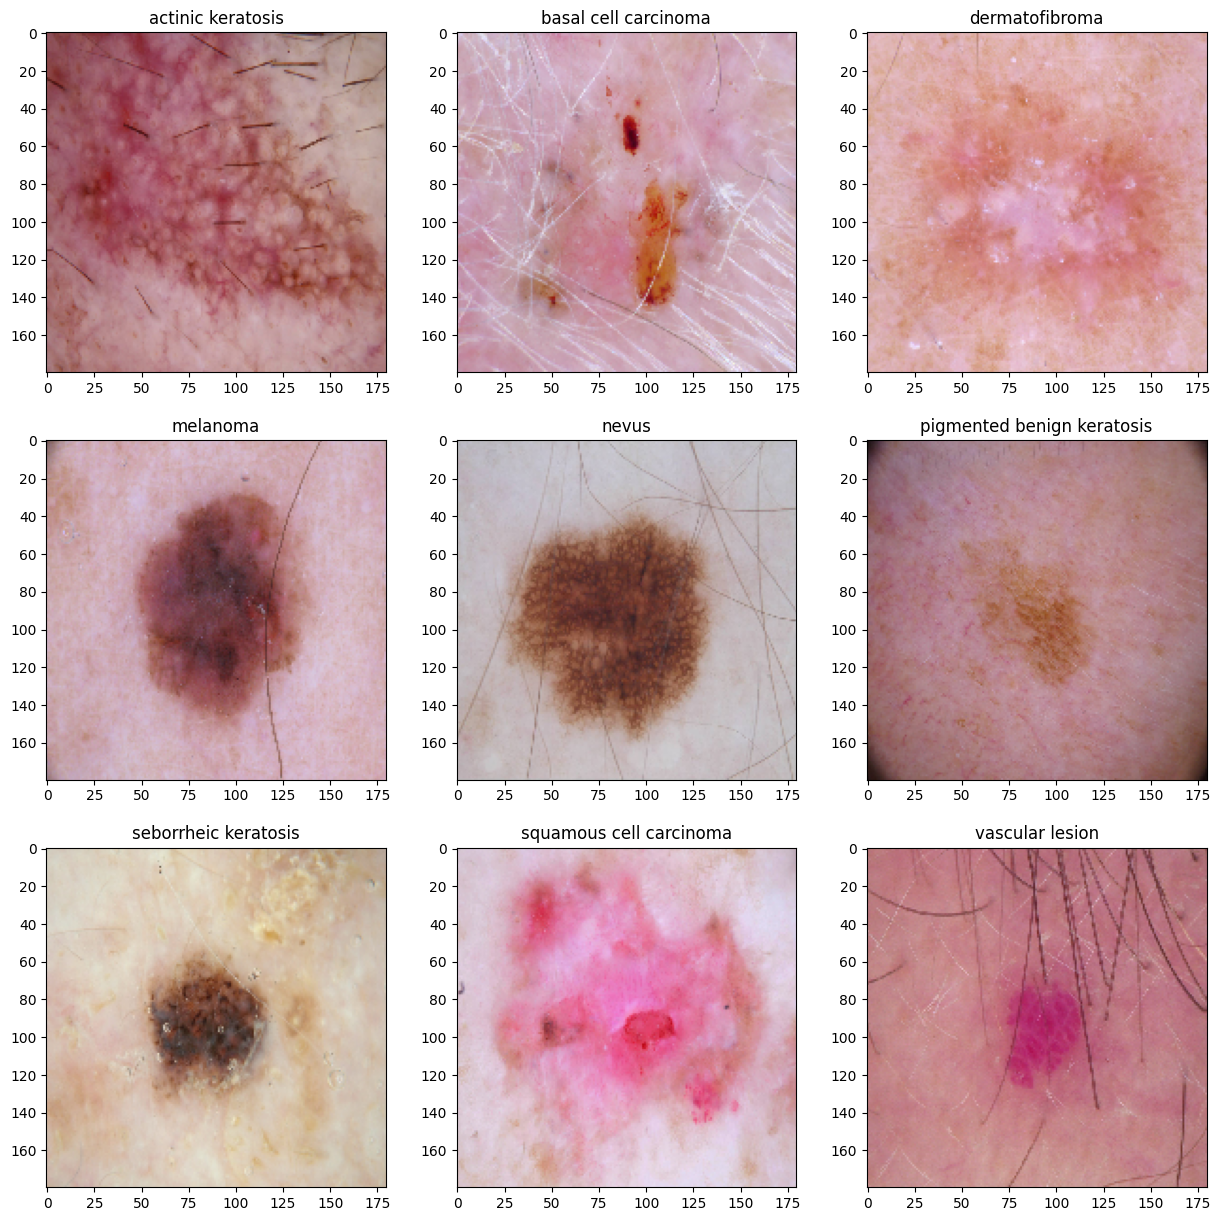

In [19]:
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

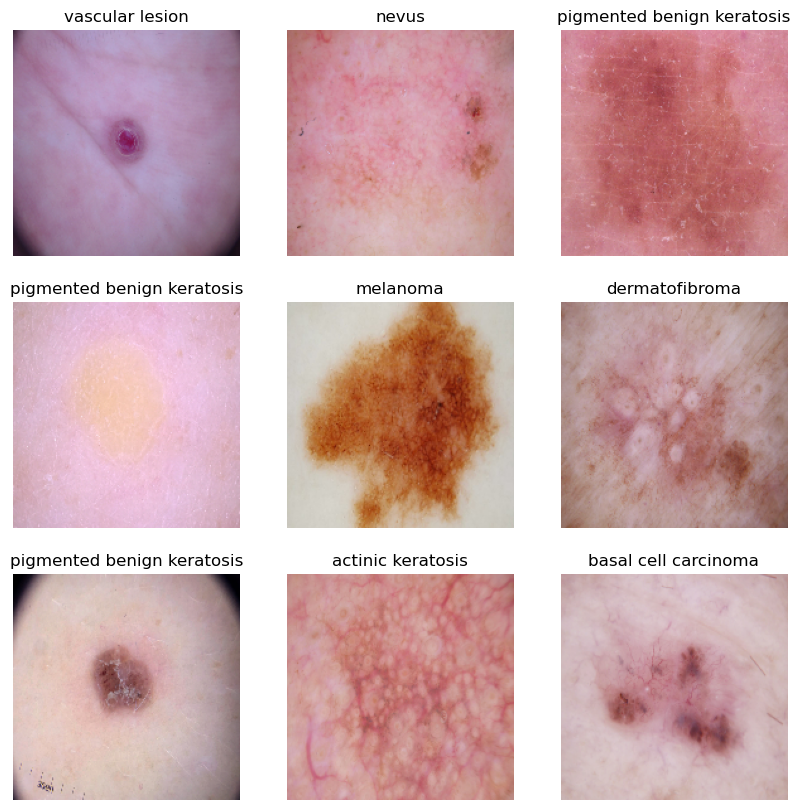

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Create the model

#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [19]:
#preprocessing_layers

In [22]:
# Define the architecture of the custom model
num_classes=len(class_names)
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)       7

### Train the Model: 

In [26]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\akash\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 37s 628ms/step - loss: 2.1202 - accuracy: 0.2227 - val_loss: 2.0263 - val_accuracy: 0.2685
Epoch 2/20
56/56 [==============================] - 42s 731ms/step - loss: 1.8874 - accuracy: 0.2935 - val_loss: 1.7842 - val_accuracy: 0.3244
Epoch 3/20
56/56 [==============================] - 46s 809ms/step - loss: 1.7417 - accuracy: 0.3599 - val_loss: 1.6209 - val_accuracy: 0.4161
Epoch 4/20
56/56 [==============================] - 50s 866ms/step - loss: 1.5366 - accuracy: 0.4593 - val_loss: 1.5807 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 51s 887ms/step - loss: 1.3986 - accuracy: 0.5095 - val_loss: 1.4897 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 48s 843ms/step - loss: 1.4221 - accuracy: 0.5067 - val_loss: 1.4036 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 49s 848ms/step - loss: 1.3347 - accuracy: 0.5229 - val_loss: 1.5251 - val_accuracy: 0.4586
Epoch 8/20

-  loss     : 0.43
-  accuracy : 0.84
-  val_loss : 2.37
-  val_acc  :  0.43

In [33]:
#history.history['accuracy']


[0.22265625,
 0.2935267984867096,
 0.3599330484867096,
 0.4592633843421936,
 0.5094866156578064,
 0.5066964030265808,
 0.5228794813156128,
 0.5535714030265808,
 0.5943080186843872,
 0.60546875,
 0.6171875,
 0.6506696343421936,
 0.7003348469734192,
 0.7165178656578064,
 0.7516741156578064,
 0.7739955186843872,
 0.7907366156578064,
 0.8052455186843872,
 0.83203125,
 0.8454241156578064]

### Visualizing the results

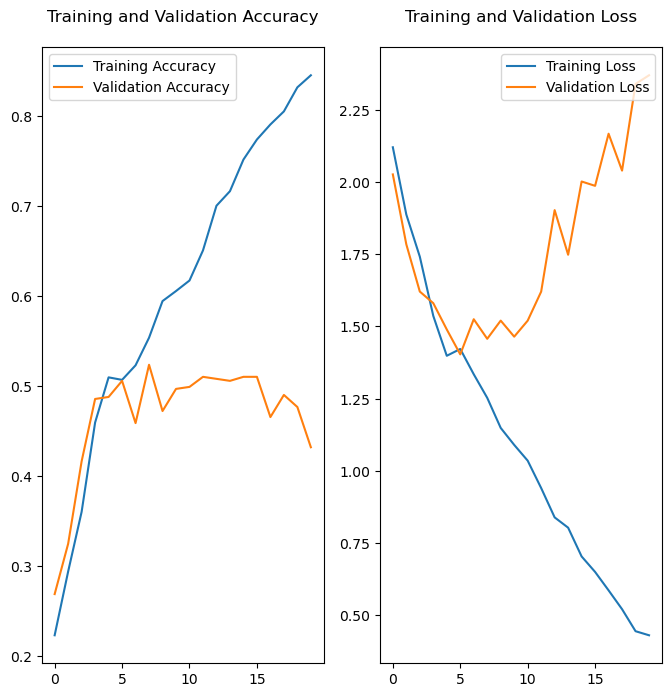

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy\n')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss\n')
plt.show()

In [20]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)


from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

2239


Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64


- Which class has the least number of samples?
 ->seborrheic keratosis

- Which classes dominate the data in terms proportionate number of samples?
 ->pigmented benign keratosis

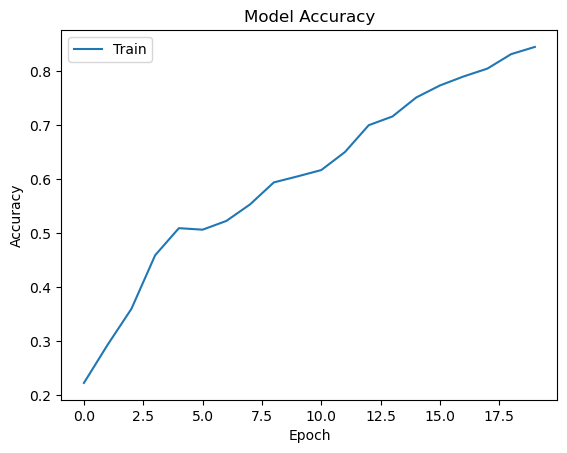

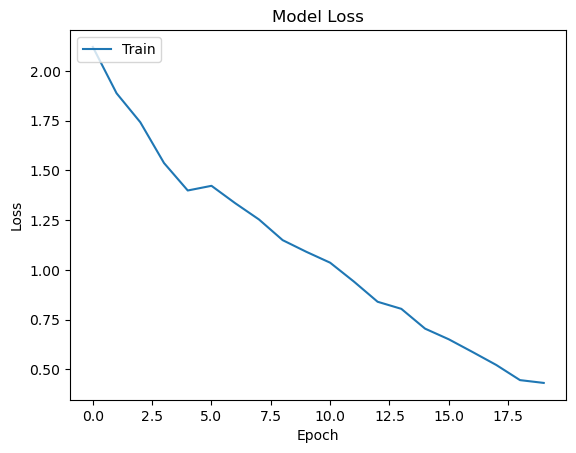

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Observations: 

-  Training accuracy is increasing and validation accuracy is dropping suddenly
-  Validation accuracy is initially high in the model.
-  Training loss is decreasing from left to right in the graph.
-  validation loss is increasing from certain point.

##### This concludes that model is overfitting.

In [42]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate 
#data augumentation strategy. 


### Data augumentation strategy

When the model is overfitting, data augmentation can be an effective technique to help reduce overfitting and improve generalization. Data augmentation involves applying various transformations to the existing training data to create new, slightly modified samples. This artificially increases the diversity and variability of the training set.

To apply data augmentation in TensorFlow, we can utilize the ImageDataGenerator class, which provides built-in functionality for generating augmented data batches. 

In [44]:
#importing the requirements
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])

In [54]:
data_augmentation

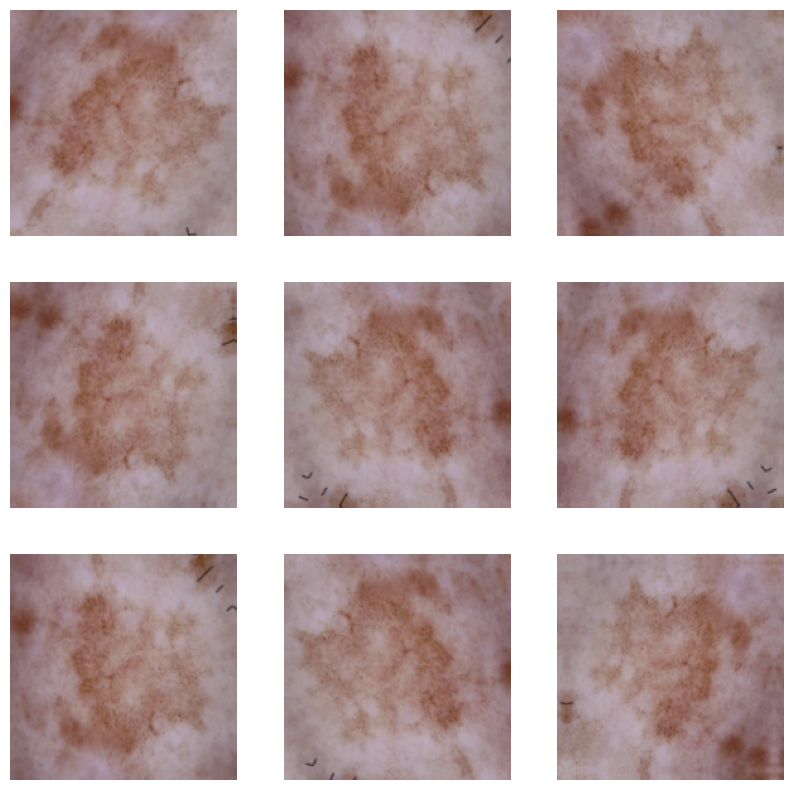

In [59]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    

### Model 2 with Augumentation

In [61]:
# Define the architecture of the custom model
num_classes=len(class_names)
model = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

### Compiling the model

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

### Train augumented model

In [64]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\akash\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 40s 683ms/step - loss: 2.0386 - accuracy: 0.2723 - val_loss: 1.6729 - val_accuracy: 0.4295
Epoch 2/20
56/56 [==============================] - 41s 715ms/step - loss: 1.6902 - accuracy: 0.3945 - val_loss: 1.5492 - val_accuracy: 0.4653
Epoch 3/20
56/56 [==============================] - 48s 842ms/step - loss: 1.5318 - accuracy: 0.4503 - val_loss: 1.4328 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 50s 881ms/step - loss: 1.4515 - accuracy: 0.4866 - val_loss: 1.4704 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 50s 874ms/step - loss: 1.4152 - accuracy: 0.4916 - val_loss: 1.4602 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 50s 871ms/step - loss: 1.3800 - accuracy: 0.5061 - val_loss: 1.4693 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 49s 855ms/step - loss: 1.3617 - accuracy: 0.5357 - val_loss: 1.3727 - val_accuracy: 0.5324
Epoch 8/20

### Visuilization

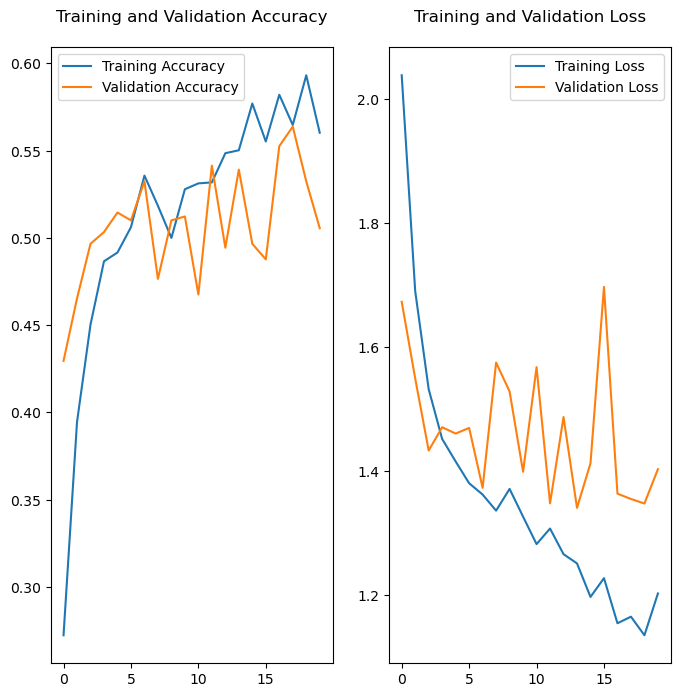

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy\n')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss\n')
plt.show()

### Observations: 

-  Validation accuracy has been increased from previous model.
-  Accuracy is low.
-  validation loss has more changes from previous model. 

### Todo: Find the distribution of classes in the training dataset.

##### Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

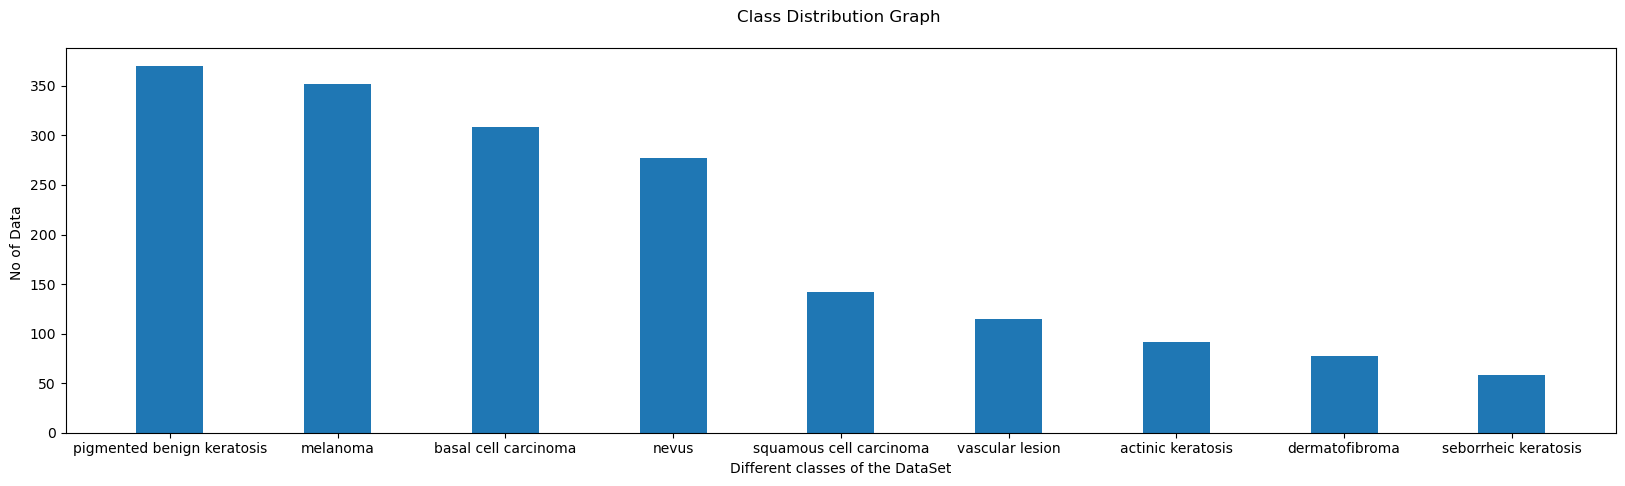

In [70]:
labels = []
for x, y in train_ds:
  labels.append(y.numpy())
labels = np.concatenate(labels, axis = 0)
train_df = pd.DataFrame(labels)
train_df.columns = ['Index']
train_df['Label'] = train_df['Index'].apply(lambda x: class_names[x])
freq = train_df['Label'].value_counts()

fig = plt.figure(figsize = (20, 5))
 
plt.bar(freq.index, freq.values, width = 0.4)
 
plt.xlabel("Different classes of the DataSet")
plt.ylabel("No of Data ")
plt.title("Class Distribution Graph \n")
plt.show()

### Observations: 

-  We observe that we have less data last three classes "sermatofibroma","actinic keratosis" and "seborrheic keratosis".
-  This is called class imbalance, to rectify this we will use AUGMENTOR.

#### Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [71]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

- Instantiate a Pipeline object pointing to a directory containing your initial image data set.
- Define a number of operations to perform on this data set using your Pipeline object.
- Execute these operations by calling the Pipeline’s sample() method.

In [82]:
# importing the agumentor package 
import Augmentor

# taking the Training dataset path
# path_to_training_dataset='gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
path_to_training_dataset= str(data_dir_train) + "/"
for i in class_names:
  # instantiating the pipeline object with training dataset for a specific class
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    # rotating the image
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    # We are adding 500 samples per class to make sure that none of the classes are sparse.
    p.sample(500) 

Initialised with 114 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D4C13E17F0>: 100%|█| 500/500 [00:09<00:00, 52.04 Samples/


Initialised with 376 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D4BA018AF0>: 100%|█| 500/500 [00:09<00:00, 53.32 Samples/


Initialised with 95 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D4C161A700>: 100%|█| 500/500 [00:09<00:


Initialised with 438 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D4BA00BF40>: 100%|█| 500/500 [00:56<00:00,  8.91 Samples


Initialised with 357 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x1D4C153FBB0>: 100%|█| 500/500 [00:50<00:00,  9.90 Sample


Initialised with 462 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1D4B83608B0>: 100%|█| 500/500 [00:09<00:00, 52.61 Samples/


Initialised with 77 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1D4AA418130>: 100%|█| 500/500 [00:24<00:00, 20.83 Samples


Initialised with 181 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D4C153F520>: 100%|█| 500/500 [00:09<00:


Initialised with 139 image(s) found.
Output directory set to D:\myLearnings\melaoma_caseStudy_customCNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1D4BE8B69D0>: 100%|█| 500/500 [00:09<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [83]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [86]:
import glob

In [88]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\myLearnings\\melaoma_caseStudy_customCNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_5536984e-b478-44a6-ae32-b371ce220d57.jpg',
 'D:\\myLearnings\\melaoma_caseStudy_customCNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b1c3d0ee-c432-4366-9554-407857ba0a9b.jpg',
 'D:\\myLearnings\\melaoma_caseStudy_customCNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c4282dfe-0c01-420c-bc5f-de35ff981d3c.jpg',
 'D:\\myLearnings\\melaoma_caseStudy_customCNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_396219f9-fbe2-4144-a0f5-9a7e07cac42b.jpg',
 'D:\\my

In [90]:
# taking the skin cancer type in a list
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [93]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [94]:
# creating a dataframe with the above dictionary
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2
# new_df = original_df.append(df2)

In [95]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

- Now by using Augmentor we can get 500 images in each class

#### Todo: Train the model on the data created using Augmentor

In [96]:
batch_size = 32
img_height = 180
img_width = 180

### Todo: Create a training dataset

In [98]:
#data_dir_train="path to directory with training data + data created using augmentor"
#Keeping the directory path same as earlier, as keras reads all the images from subfolders as well
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Todo: Create a validation dataset

In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Todo: Create your model (make sure to include normalization)

In [100]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [101]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.021078074 0.90359473


### Todo: Compile your model (Choose optimizer and loss function appropriately)

In [102]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)])

In [103]:
# Define the architecture of the custom model
num_classes=len(class_names)
model = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [104]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                

### Todo: Train your model

In [105]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


C:\Users\akash\anaconda3\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 236s 1s/step - loss: 1.9082 - accuracy: 0.2804 - val_loss: 1.6948 - val_accuracy: 0.3385
Epoch 2/30
169/169 [==============================] - 207s 1s/step - loss: 1.5535 - accuracy: 0.4084 - val_loss: 1.4556 - val_accuracy: 0.4380
Epoch 3/30
169/169 [==============================] - 208s 1s/step - loss: 1.4556 - accuracy: 0.4412 - val_loss: 1.4082 - val_accuracy: 0.4603
Epoch 4/30
169/169 [==============================] - 210s 1s/step - loss: 1.3824 - accuracy: 0.4701 - val_loss: 1.2893 - val_accuracy: 0.5212
Epoch 5/30
169/169 [==============================] - 208s 1s/step - loss: 1.3449 - accuracy: 0.4866 - val_loss: 1.2509 - val_accuracy: 0.5152
Epoch 6/30
169/169 [==============================] - 207s 1s/step - loss: 1.2872 - accuracy: 0.5147 - val_loss: 1.2160 - val_accuracy: 0.5033
Epoch 7/30
169/169 [==============================] - 203s 1s/step - loss: 1.2353 - accuracy: 0.5252 - val_loss: 1.2606 - val_accuracy: 0.5160
Epoch 8/30

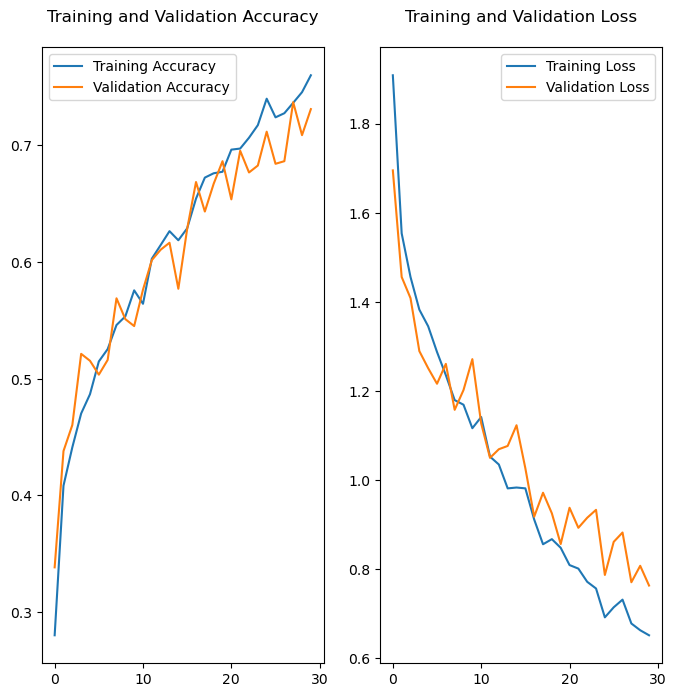

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy\n')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss\n')
plt.show()

### Observations: 

-  Here if we observe, accuracy and validation accuracy is very near.
-  Model got rid of overfitting.
-  We also can observe that class imbalance got helped to improve our model overall accuracy.